# **Importing the dataset**

In [1]:
import pandas as pd
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')

In [2]:
print(dataset_train.head())

       Date        Open        High        Low       Close    Volume
0  1/3/2005   98.331429  101.439781  97.365051  100.976517  31807176
1  1/4/2005  100.323959  101.086105  96.378746   96.886841  27614921
2  1/5/2005   96.363808   98.082359  95.756081   96.393692  16534946
3  1/6/2005   97.175758   97.584229  93.509506   93.922951  20852067
4  1/7/2005   94.964050   96.762314  94.037521   96.563057  19398238


# **Analysing the dataset**

### **Removing unwanted columns**

In [4]:
train_data = dataset_train.iloc[:, 1:2].values
test_data = dataset_test.iloc[:, 1:2].values

In [5]:
print(train_data)

[[  98.331429]
 [ 100.323959]
 [  96.363808]
 ...
 [2027.880005]
 [2057.629883]
 [2059.120117]]


### **Dataset size**

In [6]:
print('Training set: ', len(train_data))
print('Testing set: ', len(test_data))

Training set:  4089
Testing set:  21


### **Checking if there any null values.**

In [7]:
print('Total null values: ', dataset_train['Open'].isnull().sum())

Total null values:  0


### **Visualising the Google Stock Opening Price**

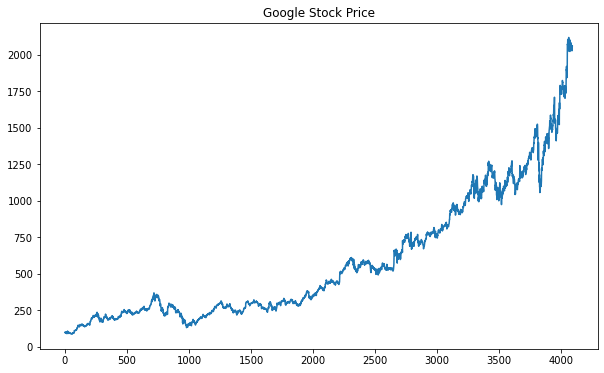

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.title('Google Stock Price')
plt.plot(dataset_train['Open'])
plt.show()

# **Feature Scaling**

In [9]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
sc_train_data = sc.fit_transform(train_data)

# **Creating data structure with 150 timesteps and 1 output**

In [10]:
import numpy as np
X_train = []
y_train = []
for i in range(150, len(train_data)):
    X_train.append(sc_train_data[i-150:i, 0])
    y_train.append(sc_train_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [11]:
print(X_train)

[[0.00541783 0.00639843 0.00444948 ... 0.03007997 0.02947935 0.02995739]
 [0.00639843 0.00444948 0.00484908 ... 0.02947935 0.02995739 0.0290013 ]
 [0.00444948 0.00484908 0.00376061 ... 0.02995739 0.0290013  0.02859926]
 ...
 [0.73314269 0.74148442 0.73562303 ... 0.97347377 0.96335537 0.96042711]
 [0.74148442 0.73562303 0.74838422 ... 0.96335537 0.96042711 0.95502343]
 [0.73562303 0.74838422 0.77086514 ... 0.96042711 0.95502343 0.9696645 ]]


In [12]:
print(y_train)

[0.0290013  0.02859926 0.02843746 ... 0.95502343 0.9696645  0.9703979 ]


# **Reshaping to train in RNN**

In [13]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# **Building and training the RNN**

### **Importing the libraries**

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### **Initialising the RNN**

In [16]:
regressor = Sequential()

### **Adding LSTM layers with some dropout regularisation**

In [17]:
# 1st layer
regressor.add(LSTM(units = 60, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# 2nd layer
regressor.add(LSTM(units = 60, return_sequences = True))
regressor.add(Dropout(0.2))

# 3rd layer
regressor.add(LSTM(units = 60, return_sequences = True))
regressor.add(Dropout(0.2))

# 4th layer
regressor.add(LSTM(units = 60))
regressor.add(Dropout(0.2))

### **Adding the output layer**

In [18]:
regressor.add(Dense(units = 1))

### **Compiling the RNN**

In [19]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

### **Fitting the training data into RNN**

In [20]:
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
124/124 [==============================] - 39s 266ms/step - loss: 0.0190
Epoch 2/100
124/124 [==============================] - 34s 272ms/step - loss: 0.0013
Epoch 3/100
124/124 [==============================] - 34s 271ms/step - loss: 0.0015
Epoch 4/100
124/124 [==============================] - 34s 273ms/step - loss: 0.0012
Epoch 5/100
124/124 [==============================] - 34s 272ms/step - loss: 0.0020
Epoch 6/100
124/124 [==============================] - 34s 272ms/step - loss: 0.0010
Epoch 7/100
124/124 [==============================] - 34s 273ms/step - loss: 0.0013
Epoch 8/100
124/124 [==============================] - 34s 273ms/step - loss: 0.0012
Epoch 9/100
124/124 [==============================] - 34s 272ms/step - loss: 7.8465e-04
Epoch 10/100
124/124 [==============================] - 34s 273ms/step - loss: 8.9395e-04
Epoch 11/100
124/124 [==============================] - 34s 272ms/step - loss: 0.0011
Epoch 12/100
124/124 [==============================] -

### **Making predictions**

In [22]:
dataset = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)

In [35]:
inputs = dataset[len(dataset)-len(dataset_test)-150:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)       #Feature Scaling

In [36]:
X_test = []
for i in range(150, 171):
  X_test.append(inputs[i-150:i, 0])     #Data Structure
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))    #Reshaping

In [37]:
prediction = regressor.predict(X_test)
prediction = sc.inverse_transform(prediction)

# **Visualising Real and Predicted Google Stock Prices pattern**

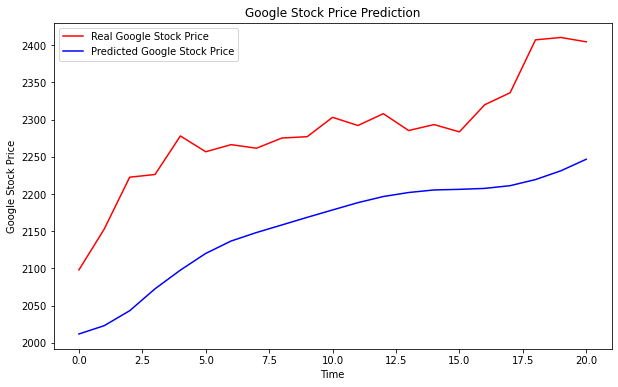

In [41]:
plt.figure(figsize=(10,6))
plt.plot(test_data, color = 'red', label = 'Real Google Stock Price')
plt.plot(prediction, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()